# Spotify Wrapped Personalizado

In [1]:
import spotipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from spotipy.oauth2 import SpotifyOAuth
from main_functions import *

#Librerías de IA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

plt.rcParams['font.family'] = 'DejaVu Sans'

print("¡Entorno listo para Spotify Wrapped!")

¡Entorno listo para Spotify Wrapped!


Autenticación con Spotify

In [2]:
sp = authenticate_spotify()

¡Autenticado como: rubmuiper!


Obtener los artistas y canciones más escuchadas

In [3]:
top_artists = get_top_artists(sp, 50)

artists_n = 20
print(f"\nTus {artists_n} artistas más escuchados:")
display_top_artists(top_artists, artists_n)


Tus 20 artistas más escuchados:
1. Sen Senra - Género: 
2. C. Tangana - Género: flamenco
3. Bad Bunny - Género: reggaeton, trap latino, latin, urbano latino
4. Extremoduro - Género: 
5. Jorge Drexler - Género: trova, singer-songwriter, nueva trova, latin folk
6. Cruz Cafuné - Género: 
7. Kase.O - Género: latin hip hop
8. CA7RIEL & Paco Amoroso - Género: 
9. Ayax y Prok - Género: rap
10. El Combo Dominicano - Género: merengue, orchestra, bachata
11. Dano - Género: argentine trap, latin hip hop, boom bap
12. Ghali - Género: italian trap
13. Bruno Mars - Género: 
14. Omar Montes - Género: flamenco, flamenco urbano, flamenco pop
15. KEVIN ROLDAN - Género: reggaeton, trap latino, urbano latino
16. Pino D'Angiò - Género: italo disco, italo dance
17. Quevedo - Género: reggaeton
18. Rels B - Género: urbano latino, trap latino
19. Estopa - Género: flamenco, flamenco pop
20. Bad Gyal - Género: neoperreo


In [4]:
top_tracks = get_top_tracks(sp, limit=50)

tracks_n = 20
print(f"\nTus {tracks_n} canciones más escuchadas:")
display_top_tracks(top_tracks, display_limit=tracks_n)


Tus 20 canciones más escuchadas:
1. 19 Dias y 500 Noches - Artista: Joaquín Sabina
2. Qué Facilidad - Artista: Sen Senra
3. BAILE INoLVIDABLE - Artista: Bad Bunny
4. Duro De Verdad pt.2 - Artista: Los Sufridos
5. Goteras - Artista: Omar Montes
6. Muriendo De Envidia - Artista: C. Tangana
7. De Ti - Artista: Sen Senra
8. Hong Kong - Artista: C. Tangana
9. Ya No Te Hago Falta - Artista: Sen Senra
10. Como Camarón - Artista: Estopa
11. Tank! - Artista: SEATBELTS
12. Scotty Doesn't Know - Artista: Lustra
13. Uno De Eses Gatos - Artista: Sen Senra
14. Todo se transforma - Artista: Jorge Drexler
15. So payaso - Artista: Extremoduro
16. Libertad - Artista: Kase.O
17. Ma quale idea - Artista: Pino D'Angiò
18. Into Yesterday - Artista: Sugar Ray
19. Los Tontos - Artista: C. Tangana
20. Teknocity - Artista: Parkineos


Este gráfico nos muestra que tan mainstream eres. O sin embargo tienes un gusto que no se adapta a lo popular.

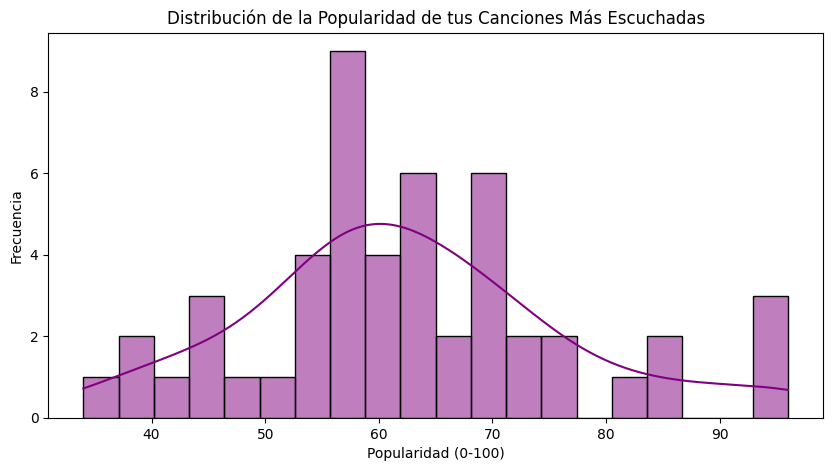

In [5]:
track_popularity = [track['popularity'] for track in top_tracks['items']]

plt.figure(figsize=(10, 5))
sns.histplot(track_popularity, bins=20, kde=True, color='purple')
plt.title('Distribución de la Popularidad de tus Canciones Más Escuchadas')
plt.xlabel('Popularidad (0-100)')
plt.ylabel('Frecuencia')
plt.show()

Años de lanzamiento de tus canciones más escuchadas

C:\Users\RUBEN\AppData\Local\Temp\ipykernel_14604\2735899426.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='decade', data=year_df, palette='coolwarm', order=year_df['decade'].value_counts().index)


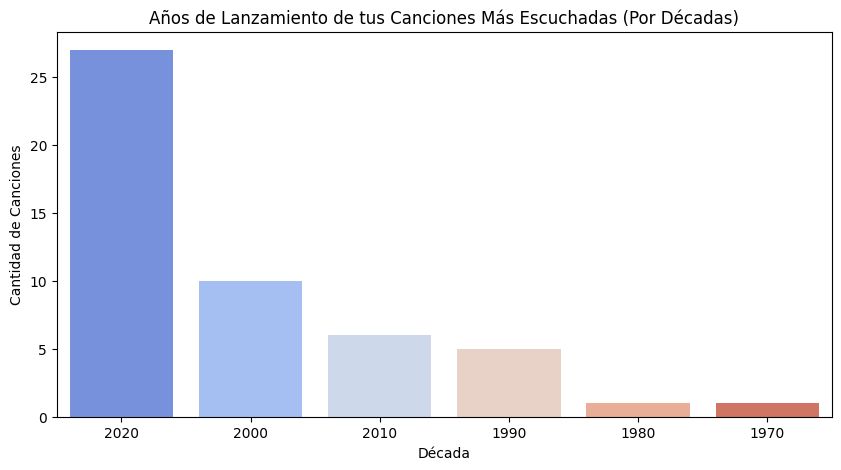

In [6]:
track_years = [int(track['album']['release_date'][:4]) for track in top_tracks['items']]

year_df = pd.DataFrame(track_years, columns=['year'])

year_df['decade'] = (year_df['year'] // 10) * 10

plt.figure(figsize=(10, 5))
sns.countplot(x='decade', data=year_df, palette='coolwarm', order=year_df['decade'].value_counts().index)
plt.title('Años de Lanzamiento de tus Canciones Más Escuchadas (Por Décadas)')
plt.xlabel('Década')
plt.ylabel('Cantidad de Canciones')
plt.show()

Creamos un dataframe con los artistas más escuchados y su género musical

In [7]:
artist_data = pd.DataFrame(top_artists['items'])

artist_data_clean = artist_data[['name', 'genres', 'followers', 'popularity']].copy()

artist_data_clean.loc[:, 'genres'] = artist_data_clean['genres'].apply(lambda x: ', '.join(x) if x else 'Desconocido')

print(artist_data_clean.head())


            name                                             genres  \
0      Sen Senra                                        Desconocido   
1     C. Tangana                                           flamenco   
2      Bad Bunny       reggaeton, trap latino, latin, urbano latino   
3    Extremoduro                                        Desconocido   
4  Jorge Drexler  trova, singer-songwriter, nueva trova, latin folk   

                           followers  popularity  
0    {'href': None, 'total': 248734}          65  
1   {'href': None, 'total': 2952696}          73  
2  {'href': None, 'total': 93042375}         100  
3   {'href': None, 'total': 1490821}          65  
4    {'href': None, 'total': 888564}          65  


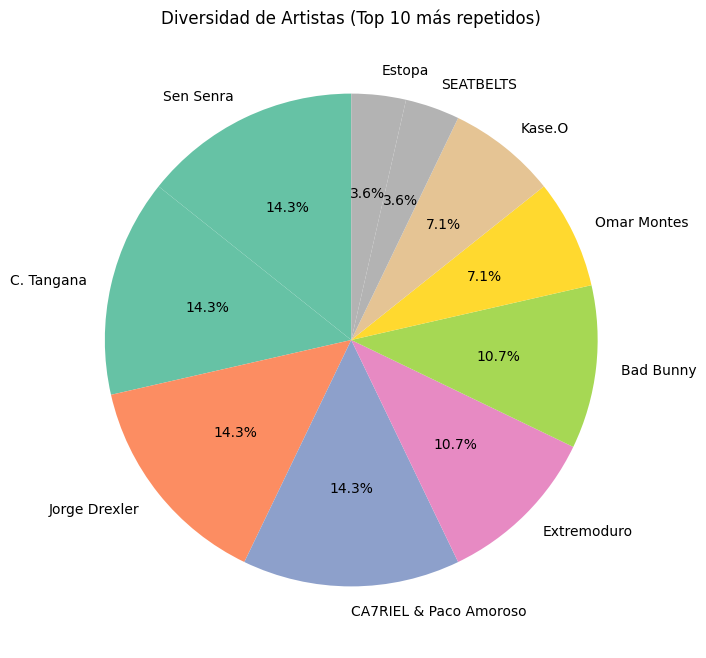

In [8]:
artist_counts = pd.Series([track['artists'][0]['name'] for track in top_tracks['items']]).value_counts()

# Mostrar un gráfico de pastel con los 10 artistas más repetidos
plt.figure(figsize=(8, 8))
artist_counts.head(10).plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title('Diversidad de Artistas (Top 10 más repetidos)')
plt.ylabel('')
plt.show()


Vamos a analizar los géneros más escuchados

genre
nueva trova          1.167080
trova                1.167080
singer-songwriter    1.167080
flamenco             0.711606
latin                0.412526
urbano latino        0.412526
reggaeton            0.412526
trap latino          0.412526
flamenco pop         0.325641
flamenco urbano      0.248897
Name: weight, dtype: float64


C:\Users\RUBEN\AppData\Local\Temp\ipykernel_14604\346940224.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_weights.head(10).values, y=genre_weights.head(10).index, palette='viridis')


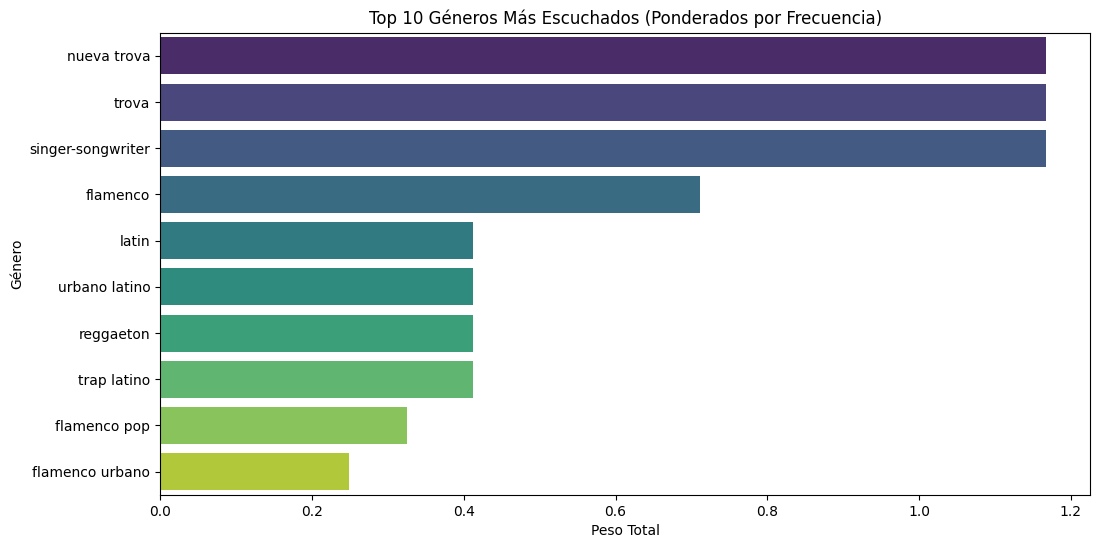

In [9]:
#Procesar las canciones y sus géneros y obtener los detalles de estos
track_data = []

for idx, track in enumerate(top_tracks['items']):
    track_name = track['name']
    main_artist = track['artists'][0]['name']
    artist_id = track['artists'][0]['id']
    
    artist_info = sp.artist(artist_id)
    genres = artist_info['genres']

    # Guardar la información (peso inverso: canción 1 tiene más peso)
    weight = 1 / (idx + 1)  
    for genre in genres:
        track_data.append({'track': track_name, 'artist': main_artist, 'genre': genre, 'weight': weight})

track_df = pd.DataFrame(track_data)

#Calcular el peso total por género
genre_weights = track_df.groupby('genre')['weight'].sum().sort_values(ascending=False)

print(genre_weights.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_weights.head(10).values, y=genre_weights.head(10).index, palette='viridis')
plt.title('Top 10 Géneros Más Escuchados (Ponderados por Frecuencia)')
plt.xlabel('Peso Total')
plt.ylabel('Género')
plt.show()

Ordenamos los artistas según sus seguidores e identificamos el más popular de nuestro top

In [10]:
top_artists = get_top_artists(sp, limit=10)

artist_data = pd.DataFrame(top_artists['items'])
artist_data_clean = artist_data[['name', 'genres', 'followers', 'popularity']].copy()
artist_data_clean['followers'] = artist_data_clean['followers'].apply(lambda x: x['total'])

print("Tus 10 artistas más escuchados:")
print(artist_data_clean)

Tus 10 artistas más escuchados:
                     name                                             genres  \
0               Sen Senra                                                 []   
1              C. Tangana                                         [flamenco]   
2               Bad Bunny     [reggaeton, trap latino, latin, urbano latino]   
3             Extremoduro                                                 []   
4           Jorge Drexler  [trova, singer-songwriter, nueva trova, latin ...   
5             Cruz Cafuné                                                 []   
6                  Kase.O                                    [latin hip hop]   
7  CA7RIEL & Paco Amoroso                                                 []   
8             Ayax y Prok                                              [rap]   
9     El Combo Dominicano                     [merengue, orchestra, bachata]   

   followers  popularity  
0     248734          65  
1    2952696          73  
2   93

In [11]:
most_followed_artist = artist_data_clean.loc[artist_data_clean['followers'].idxmax()]
print(f"\nArtista con más seguidores: {most_followed_artist['name']} - {most_followed_artist['followers']} seguidores")


Artista con más seguidores: Bad Bunny - 93042375 seguidores


C:\Users\RUBEN\AppData\Local\Temp\ipykernel_14604\2603963081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_data_clean['popularity'], y=artist_data_clean['name'], palette='magma')
d:\PROGRAMACION\spotify_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


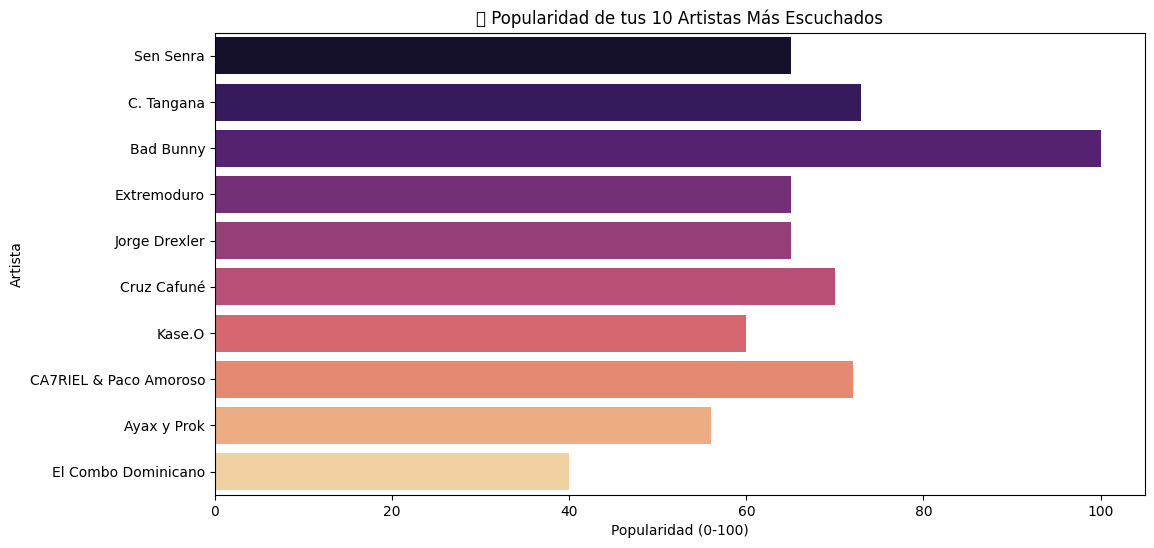

In [12]:
# Gráfico de barras con los artistas más populares (de tus 10 más escuchados)
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_data_clean['popularity'], y=artist_data_clean['name'], palette='magma')
plt.title('🔥 Popularidad de tus 10 Artistas Más Escuchados')
plt.xlabel('Popularidad (0-100)')
plt.ylabel('Artista')
plt.show()